# vggish tests

<a href="https://colab.research.google.com/github/inspektral/onset-benchmark/blob/main/vggish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

if 'google.colab' in str(get_ipython()):
    repo_name = 'onset-benchmark'
    repo_path = f'/content/{repo_name}'
    
    # Check if the current working directory is already the repo
    if os.getcwd() != repo_path:
        if not os.path.exists(repo_path):
            !git clone https://github.com/inspektral/onset-benchmark.git
        os.chdir(repo_path)  # Change to the repository directory
        !pip install -r requirements.txt  # Install dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display

import utils


In [5]:
import test_signals

tests = {}

for name, obj in vars(test_signals).items():
    if callable(obj):
        tests[name] = obj

print("Available tests:")
for i, name in enumerate(tests.keys()):
    print(f"{i}: {name}")



Available tests:
0: random_sines
1: saw_noise
2: sines_noise
3: filter_saw


In [6]:
SAMPLE_RATE = 44100
CURRENT_TEST = 1

Running test: saw_noise


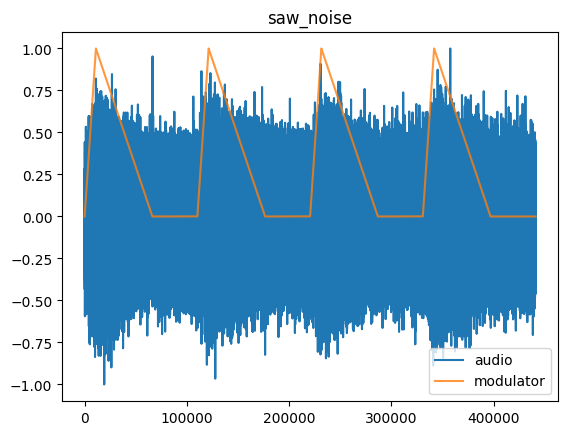

In [7]:
test = tests[list(tests.keys())[CURRENT_TEST]]
print(f"Running test: {test.__name__}")
audio, modulator = test()

plt.plot(audio, label='audio')
modulator = utils.norm(synth.stretch_array(modulator, len(audio)))
plt.plot(modulator, alpha=0.8, label='modulator')
plt.title(test.__name__)
plt.legend()

plt.show()

display(Audio(audio, rate=SAMPLE_RATE))

2025-05-21 17:55:30.214984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-05-21 17:55:30.215020: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[   INFO   ] MusicExtractorSVM: no classifier models were configured by default
2025-05-21 17:55:30.758987: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-21 17:55:30.760401: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2025-05-21 17:55:30.778254

embeddings:  [[0.         0.01308399 0.40170038 ... 0.         0.10596672 0.        ]
 [0.         0.00749877 0.21081105 ... 0.         0.19334455 0.        ]
 [0.         0.12634334 0.30838564 ... 0.         0.20767769 0.        ]
 ...
 [0.         0.0408688  0.20307267 ... 0.         0.19368118 0.        ]
 [0.         0.13850641 0.10077384 ... 0.         0.3841176  0.        ]
 [0.         0.18539564 0.21578014 ... 0.         0.48577863 0.        ]]
embeddings shape:  (128, 29)


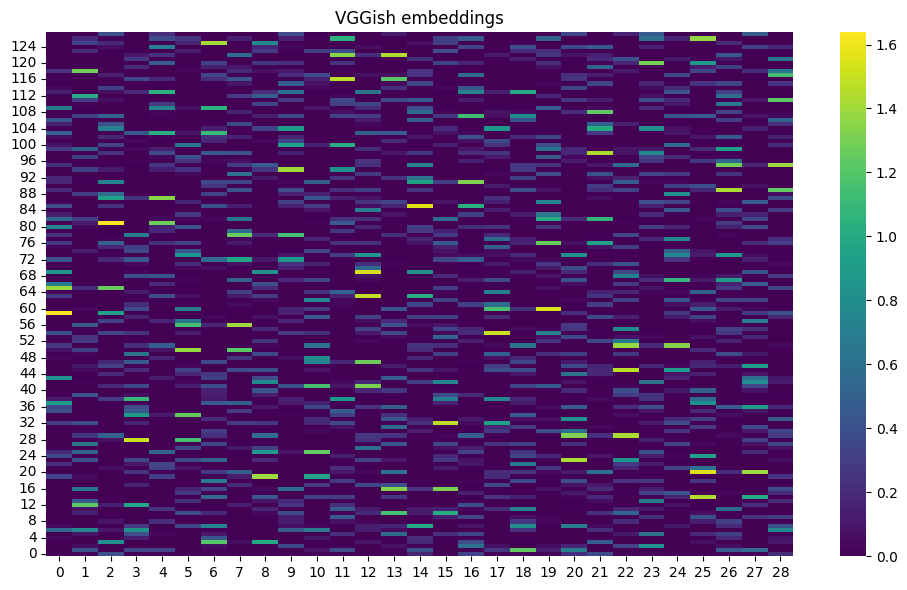

In [ ]:
from essentia.standard import TensorflowPredictVGGish

model = TensorflowPredictVGGish(graphFilename="weights/audioset-vggish-3.pb", output="model/vggish/embeddings")
embeddings = model(audio)

print("embeddings: ", embeddings)
embeddings = np.array(embeddings)
embeddings = np.reshape(embeddings, (embeddings.shape[1], embeddings.shape[0]))

print("embeddings shape: ", embeddings.shape)

utils.plot_heatmap(embeddings, title="VGGish embeddings")

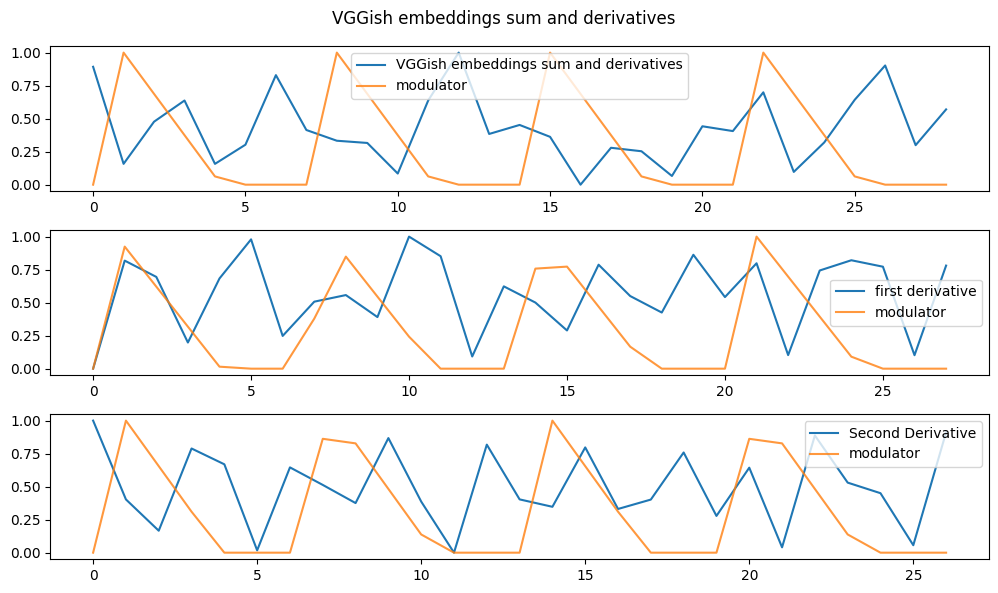

In [9]:


embeddings_sum = np.sum(embeddings, axis=0)
d_embeddings_sum = np.diff(embeddings_sum)
dd_embeddings_sum = np.diff(d_embeddings_sum)

utils.plot_with_derivatives(
    embeddings_sum,
    d_embeddings_sum,
    dd_embeddings_sum,
    modulator,
    title="VGGish embeddings sum and derivatives",
)



distances shape: (128, 28)


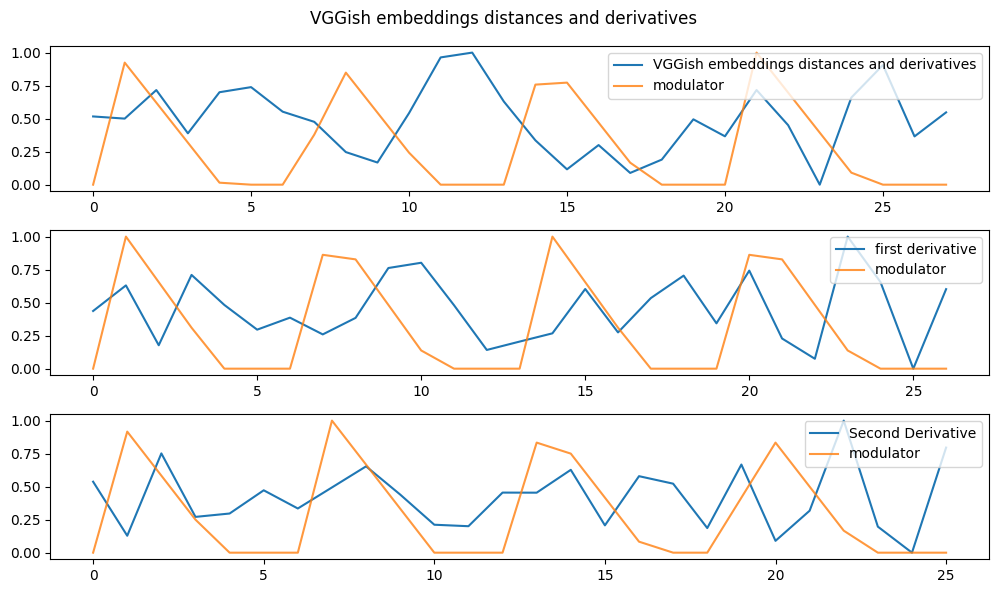

In [10]:
embeddings_distances = utils.distances(embeddings)
d_embeddings_distances = np.diff(embeddings_distances)
dd_embeddings_distances = np.diff(d_embeddings_distances)

utils.plot_with_derivatives(
    embeddings_distances,
    d_embeddings_distances,
    dd_embeddings_distances,
    modulator,
    title="VGGish embeddings distances and derivatives",
)

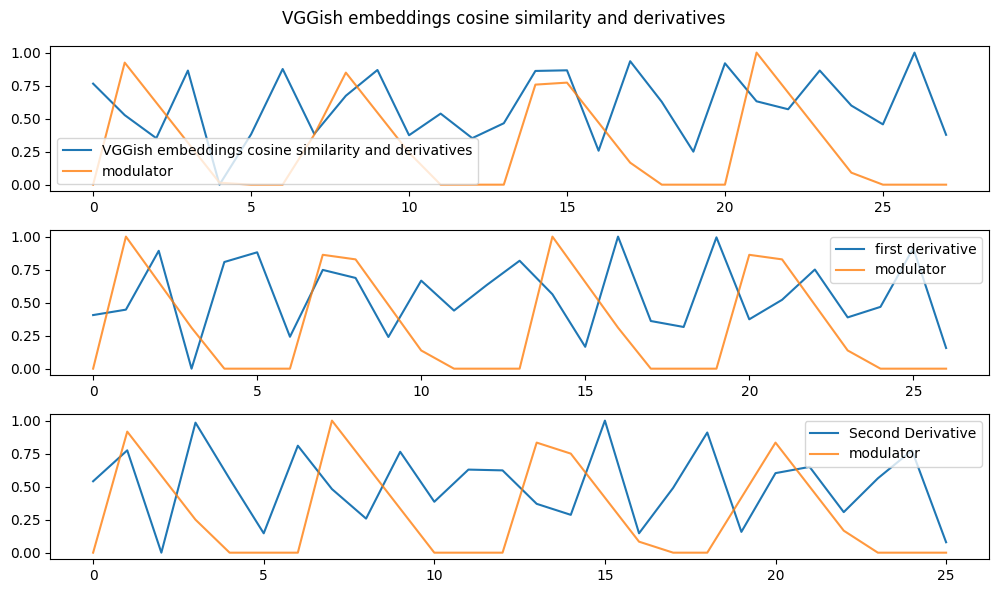

In [11]:
embeddings_cosine = utils.cosine_similarity(embeddings)
d_embeddings_cosine = np.diff(embeddings_cosine)
dd_embeddings_cosine = np.diff(d_embeddings_cosine)

utils.plot_with_derivatives(
    embeddings_cosine,
    d_embeddings_cosine,
    dd_embeddings_cosine,
    modulator,
    title="VGGish embeddings cosine similarity and derivatives",
)